<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista1_Simula%C3%A7%C3%A3o_Estoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista 1

##1ª Questão Letra A:

In [ ]:
# Retirado do github do professor
# XORSHIFT
def xorshift128():
    '''xorshift
    https://en.wikipedia.org/wiki/Xorshift
    '''
    x = 123456789
    y = 362436069
    z = 521288629
    w = 88675123
    def _random():
        nonlocal x, y, z, w
        t = x ^ ((x << 11) & 0xFFFFFFFF)  # 32bit
        x, y, z = y, z, w
        w = (w ^ (w >> 19)) ^ (t ^ (t >> 8))
        return w

    return _random



In [ ]:
# Retirado do github do professor
#LCG
def lcg():

    r = 88675123
    a = 1140671485
    c = 128201163
    m = 2**24

    def _random():
        nonlocal a, c, m, r
        r = (a*r + c) % m
        return r

    return _random

In [ ]:
# Retirado github do professor
# coefficients for MT19937
(w, n, m, r) = (32, 624, 397, 31)
a = 0x9908B0DF
(u, d) = (11, 0xFFFFFFFF)
(s, b) = (7, 0x9D2C5680)
(t, c) = (15, 0xEFC60000)
l = 18
f = 1812433253


# make a arry to store the state of the generator
MT = [0 for i in range(n)]
index = n+1
lower_mask = 0x7FFFFFFF #(1 << r) - 1 // That is, the binary number of r 1's
upper_mask = 0x80000000 #lowest w bits of (not lower_mask)


# initialize the generator from a seed
def mt_seed(seed):
    # global index
    # index = n
    MT[0] = seed
    for i in range(1, n):
        temp = f * (MT[i-1] ^ (MT[i-1] >> (w-2))) + i
        MT[i] = temp & 0xffffffff


# Extract a tempered value based on MT[index]
# calling twist() every n numbers
def extract_number():
    global index
    if index >= n:
        twist()
        index = 0

    y = MT[index]
    y = y ^ ((y >> u) & d)
    y = y ^ ((y << s) & b)
    y = y ^ ((y << t) & c)
    y = y ^ (y >> l)

    index += 1
    return y & 0xffffffff


# Generate the next n values from the series x_i
def twist():
    for i in range(0, n):
        x = (MT[i] & upper_mask) + (MT[(i+1) % n] & lower_mask)
        xA = x >> 1
        if (x % 2) != 0:
            xA = xA ^ a
        MT[i] = MT[(i + m) % n] ^ xA


In [ ]:
# Números gerados pelo xorshift
r = xorshift128()
xf = []
for i in range(1000):
    xf.append(r())
    print(r())

458299110
3633119408
2377269574
717229868
395339113
1728310821
1187274473
4061953237
448488982
934407046
3932869644
2728332712
830734233
544153312
795757459
811349640
2498575418
3358478731
3936394860
4150927415
2247676300
4203610453
4181181390
821167952
3450572369
915111097
93322358
3891095700
807202386
1127670696
2292206759
803679970
815741160
953388206
3479117322
3970092026
2893102642
2588888210
1790338362
2938346451
2746337472
472945036
4105194587
811811817
3429148052
1983488016
574977749
3144270827
1485628537
4083996137
729220402
3245564400
2052469741
1568676215
2684620869
3466816099
293646974
4223246021
1315449462
3079323632
2574302570
1773342156
3283363243
2611378468
3161323654
674890201
2508509402
81862587
81256123
2609929742
2696673962
711794170
1370576245
2186880074
1941397434
864964744
3876570220
754297947
4222009731
3796717532
3622376858
3786645965
396518359
1137137296
148643365
2146767446
3099524417
2494867906
1413022941
95729964
2536216349
4238643046
2134263273
853380689
1

In [ ]:
# Números gerados pelo LCG
r = lcg()
lcg = []
for i in range(1000):
  lcg.append(r())
  print(r())

5172533
5531463
6095337
12337563
3526365
2004527
8841233
11901187
8135045
2866711
3379001
11516267
7439661
4751103
9738081
6898387
13212117
12941543
8364169
6608187
1834877
16206799
15616689
6885539
6575653
11966391
8271321
38155
8535501
14679199
15794689
16384627
12146293
13900423
11292457
15202523
3227677
16224623
3784017
10557507
7707333
3342679
13036665
12583083
16123501
7539263
10845345
2314771
8790805
2640935
13307337
7187579
14520509
13068047
5324785
8761315
1568613
4782839
16102169
1440843
3464973
11118559
10094401
864691
9961397
6950343
12835945
1962011
8974685
969903
1888913
4118403
11752453
10519703
15894969
2787307
10930093
2872703
11968993
14655827
5696597
4284263
8305417
2147259
10183165
7717455
8680753
16027427
11520165
14786103
10842201
2466699
11780173
10588959
14896257
12755187
2812149
5652743
14920105
10364763
8184477
10766319
7350225
13555395
7687493
11814871
16148217
3100459
12830957
11722943
526113
14561427
8123797
5288615
14329929
12458747
9794365
4349327
1310168

In [ ]:
# Números gerados pelo mersenne twister
mt_seed(88675123)
mt = []
for i in range(1000):
    mt.append(extract_number())
    print(extract_number())

3313816480
622448966
2368447689
546145921
2229540777
1514927791
2155373536
1341202406
2912893060
1109158338
3022002949
2523936727
3357191896
2797024887
1881514849
2105181670
1279823049
3600884544
1783082082
2430200357
1025489737
388724505
1347819235
959896250
338825656
3884446369
3569429362
2278873556
2957599639
4054929531
1733254912
1537660744
4075515449
3965316344
829525369
1259197206
2423910830
3839454396
1509423161
816710602
3611645750
3261718505
1604399963
1480505846
3909240208
3495867915
2207992948
1231610965
1300371629
3837455587
3233338625
2671972803
4139179373
3361343153
212130573
2701424358
1841480177
389788660
459711656
1217951015
4197465845
1351579766
1571734309
2270847722
2837580926
3819524685
1028149084
3692863325
616838137
3974067308
191341907
2104308108
4239095090
4252315269
2968566880
2865553170
663861281
3158882353
3969476515
4147595649
3638777216
1238814339
3017236713
3801608067
293765363
68588600
1347199460
2805529826
746064756
41993353
3872736887
1470127375
3152200

##1ª Questão Letra B:

Text(0.5, 1.0, 'Gráfico de dispersão do Xorshift')

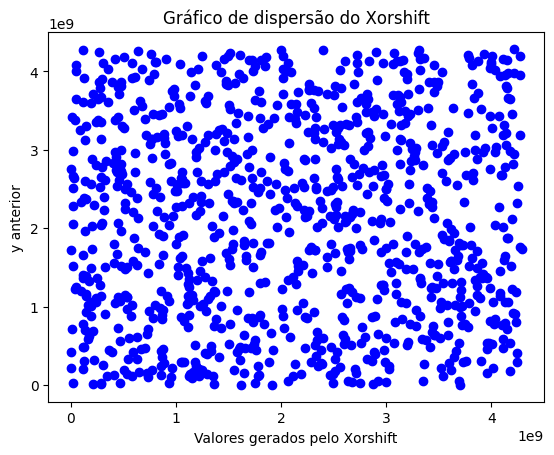

In [ ]:
import matplotlib.pyplot as plt

# Xorshift
y_xf = []
y_xf.append(0)
for i in range(1, len(xf)):
  y_xf.append(xf[i - 1])
fig, aux = plt.subplots()
aux.scatter(xf, y_xf, color = 'b')
plt.ylabel('y anterior')
plt.xlabel('Valores gerados pelo Xorshift')
plt.title('Gráfico de dispersão do Xorshift')

Text(0.5, 1.0, 'Gráfico de dispersão do LCG')

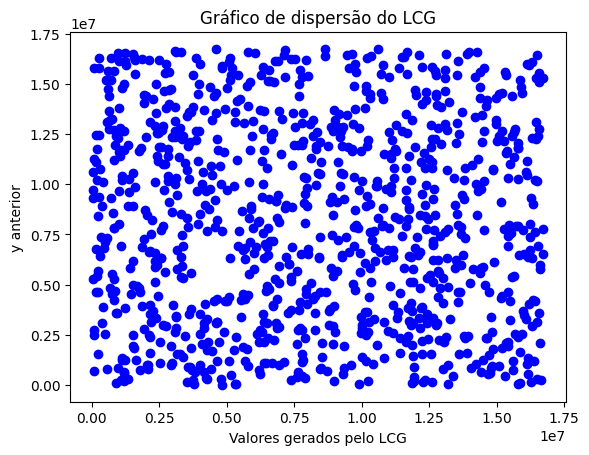

In [ ]:
# LCG
y_lcg = []
y_lcg.append(0)
for i in range(1, len(lcg)):
  y_lcg.append(lcg[i - 1])
fig, aux = plt.subplots()
aux.scatter(lcg, y_lcg, color = 'b')
plt.ylabel('y anterior')
plt.xlabel('Valores gerados pelo LCG')
plt.title('Gráfico de dispersão do LCG')

Text(0.5, 1.0, 'Gráfico de dispersão do Mersenne Twister')

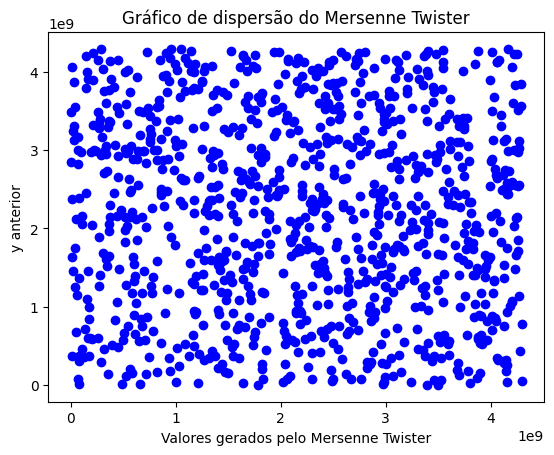

In [ ]:
y_mt = []
y_mt.append(0)
for i in range(1, len(mt)):
  y_mt.append(mt[i - 1])
fig, aux = plt.subplots()
aux.scatter(mt, y_mt, color = 'b')
plt.ylabel('y anterior')
plt.xlabel('Valores gerados pelo Mersenne Twister')
plt.title('Gráfico de dispersão do Mersenne Twister')

##2ª Questão Letra A:

In [ ]:
def lcg_mod():

    r = 88675123
    a = 1140671485
    c = 128201163
    m = 2**8

    def _random():
        nonlocal a, c, m, r
        r = (a*r + c) % m
        return r

    return _random

In [ ]:
r = lcg_mod()
for i in range(5):
  print(r())

50
53
44
71
246


##2ª Questão Letra B:

In [ ]:
vetor_50 = []
vetor_100 = []
vetor_200 = []
vetor_300 = []
r = lcg_mod()
for i in range(50):
  vetor_50.append(r())
for i in range(100):
  vetor_100.append(r())
for i in range(200):
  vetor_200.append(r())
for i in range(300):
  vetor_300.append(r())


**Variância das gerações.**

In [ ]:
def calcular_variancia(lista):
    # Passo 1: Calcular a média
    media = sum(lista) / len(lista)
    # Passo 2 e 3: Calcular as diferenças ao quadrado
    diferencas_quadradas = [(x - media) ** 2 for x in lista]
    # Passo 4: Calcular a média das diferenças ao quadrado
    variancia = sum(diferencas_quadradas) / len(lista)
    return variancia
var_vetor_50 = calcular_variancia(vetor_50)
var_vetor_100 = calcular_variancia(vetor_100)
var_vetor_200 = calcular_variancia(vetor_200)
var_vetor_300 = calcular_variancia(vetor_300)
print(f'Variância para a geração com 50 valores = {var_vetor_50}')
print(f'Variância para a geração com 100 valores = {var_vetor_100}')
print(f'Variância para a geração com 200 valores = {var_vetor_200}')
print(f'Variância para a geração com 300 valores = {var_vetor_300}')

Variância para a geração com 50 valores = 5762.147600000001
Variância para a geração com 100 valores = 4832.187600000001
Variância para a geração com 200 valores = 5477.1284000000005
Variância para a geração com 300 valores = 5465.622622222223


**Amplitude das gerações.**

In [ ]:
def calcular_amplitude(lista):
  return max(lista) - min(lista)
print(f'Amplitude da geração com 50 valores = {calcular_amplitude(vetor_50)}')
print(f'Amplitude da geração com 100 valores = {calcular_amplitude(vetor_100)}')
print(f'Amplitude da geração com 200 valores = {calcular_amplitude(vetor_200)}')
print(f'Amplitude da geração com 300 valores = {calcular_amplitude(vetor_300)}')

Amplitude da geração com 50 valores = 252
Amplitude da geração com 100 valores = 247
Amplitude da geração com 200 valores = 255
Amplitude da geração com 300 valores = 255


##2ª Questão Letra C:

In [ ]:
def calcular_distancia(lista):
  dist = [0 for _ in range(len(lista))]
  dist[0] = lista[0]
  for i in range(1, len(lista)):
    dist[i] = abs(lista[i] - lista[i - 1])
  return dist
dist_50 = calcular_distancia(vetor_50)
dist_100 = calcular_distancia(vetor_100)
dist_200 = calcular_distancia(vetor_200)
dist_300 = calcular_distancia(vetor_300)

**Variância das distâncias geradas.**

In [ ]:
print(f'Variância das distâncias da geração com 50 valores = {calcular_variancia(dist_50)}')
print(f'Variância das distâncias da geração com 100 valores = {calcular_variancia(dist_100)}')
print(f'Variância das distâncias da geração com 200 valores = {calcular_variancia(dist_200)}')
print(f'Variância das distâncias da geração com 300 valores = {calcular_variancia(dist_300)}')

Variância das distâncias da geração com 50 valores = 3644.3235999999997
Variância das distâncias da geração com 100 valores = 3569.913099999999
Variância das distâncias da geração com 200 valores = 3720.109774999999
Variância das distâncias da geração com 300 valores = 3795.084655555555


**Amplitude das distâncias geradas**

In [ ]:
print(f'Amplitude das distâncias da geração com 50 valores = {calcular_amplitude(dist_50)}')
print(f'Amplitude das distâncias da geração com 100 valores = {calcular_amplitude(dist_100)}')
print(f'Amplitude das distâncias da geração com 200 valores = {calcular_amplitude(dist_200)}')
print(f'Amplitude das distâncias da geração com 300 valores = {calcular_amplitude(dist_300)}')

Amplitude das distâncias da geração com 50 valores = 214
Amplitude das distâncias da geração com 100 valores = 236
Amplitude das distâncias da geração com 200 valores = 236
Amplitude das distâncias da geração com 300 valores = 236


##2ª Questão letra D:

In [ ]:
import random
vetor_50_random = []
vetor_100_random = []
vetor_200_random = []
vetor_300_random = []
for _ in range(50):
  vetor_50_random.append(random.randrange(256))
for _ in range(100):
  vetor_100_random.append(random.randrange(256))
for _ in range(200):
  vetor_200_random.append(random.randrange(256))
for _ in range(300):
  vetor_300_random.append(random.randrange(256))

**Comparação da variância entre o gerador proposto e o gerador da linguagem**

In [ ]:
print(f'Para 50 valores: Variância do nosso gerador = {var_vetor_50} vs Variância do gerador do python = {calcular_variancia(vetor_50_random)}')
print(f'Para 100 valores: Variância do nosso gerador = {var_vetor_100} vs Variância do gerador do python = {calcular_variancia(vetor_100_random)}')
print(f'Para 200 valores: Variância do nosso gerador = {var_vetor_200} vs Variância do gerador do python = {calcular_variancia(vetor_200_random)}')
print(f'Para 300 valores: Variância do nosso gerador = {var_vetor_300} vs Variância do gerador do python = {calcular_variancia(vetor_300_random)}')

Para 50 valores: Variância do nosso gerador = 5762.147600000001 vs Variância do gerador do python = 5420.6323999999995
Para 100 valores: Variância do nosso gerador = 4832.187600000001 vs Variância do gerador do python = 5174.859999999998
Para 200 valores: Variância do nosso gerador = 5477.1284000000005 vs Variância do gerador do python = 6154.305600000004
Para 300 valores: Variância do nosso gerador = 5465.622622222223 vs Variância do gerador do python = 5789.692933333333


**Comparação da amplitude entre o gerador proposto e o gerador da linguagem**

In [ ]:
print(f'Para 50 valores: Amplitude do nosso gerador = {calcular_amplitude(vetor_50)} vs Amplitude do gerador do python = {calcular_amplitude(vetor_50_random)}')
print(f'Para 100 valores: Amplitude do nosso gerador = {calcular_amplitude(vetor_100)} vs Amplitude do gerador do python = {calcular_amplitude(vetor_100_random)}')
print(f'Para 200 valores: Amplitude do nosso gerador = {calcular_amplitude(vetor_200)} vs Amplitude do gerador do python = {calcular_amplitude(vetor_200_random)}')
print(f'Para 300 valores: Amplitude do nosso gerador = {calcular_amplitude(vetor_300)} vs Amplitude do gerador do python = {calcular_amplitude(vetor_300_random)}')

Para 50 valores: Amplitude do nosso gerador = 252 vs Amplitude do gerador do python = 244
Para 100 valores: Amplitude do nosso gerador = 247 vs Amplitude do gerador do python = 251
Para 200 valores: Amplitude do nosso gerador = 255 vs Amplitude do gerador do python = 255
Para 300 valores: Amplitude do nosso gerador = 255 vs Amplitude do gerador do python = 252


**Distância entre os valores gerados na linguagem python**

In [ ]:
dist_random_50 = calcular_distancia(vetor_50_random)
dist_random_100 = calcular_distancia(vetor_100_random)
dist_random_200 = calcular_distancia(vetor_200_random)
dist_random_300 = calcular_distancia(vetor_300_random)

**Comparação da Variância das distâncias do nosso gerador e o gerador do python**

In [ ]:
print(f'Para 50 valores: Variância das distâncias do nosso gerador = {calcular_variancia(dist_50)} vs Variância das distâncias do python = {calcular_variancia(dist_random_50)}')
print(f'Para 100 valores: Variância das distâncias do nosso gerador = {calcular_variancia(dist_100)} vs Variância das distâncias do python = {calcular_variancia(dist_random_100)}')
print(f'Para 200 valores: Variância das distâncias do nosso gerador = {calcular_variancia(dist_200)} vs Variância das distâncias do python = {calcular_variancia(dist_random_200)}')
print(f'Para 300 valores: Variância das distâncias do nosso gerador = {calcular_variancia(dist_300)} vs Variância das distâncias do python = {calcular_variancia(dist_random_300)}')

Para 50 valores: Variância das distâncias do nosso gerador = 3644.3235999999997 vs Variância das distâncias do python = 3648.8435999999992
Para 100 valores: Variância das distâncias do nosso gerador = 3569.913099999999 vs Variância das distâncias do python = 3471.361600000001
Para 200 valores: Variância das distâncias do nosso gerador = 3720.109774999999 vs Variância das distâncias do python = 4593.905900000002
Para 300 valores: Variância das distâncias do nosso gerador = 3795.084655555555 vs Variância das distâncias do python = 3930.1379000000034


**Comparação da Amplitude das distâncias do nosso e do gerador do python**

In [ ]:
print(f'Para 50 valores: Amplitude das distâncias do nosso gerador = {calcular_amplitude(dist_50)} vs Amplitude das distâncias do gerador python = {calcular_amplitude(dist_random_50)}')
print(f'Para 100 valores: Amplitude das distâncias do nosso gerador = {calcular_amplitude(dist_100)} vs Amplitude das distâncias do gerador python = {calcular_amplitude(dist_random_100)}')
print(f'Para 200 valores: Amplitude das distâncias do nosso gerador = {calcular_amplitude(dist_200)} vs Amplitude das distâncias do gerador python = {calcular_amplitude(dist_random_200)}')
print(f'Para 300 valores: Amplitude das distâncias do nosso gerador = {calcular_amplitude(dist_300)} vs Amplitude das distâncias do gerador python = {calcular_amplitude(dist_random_300)}')

Para 50 valores: Amplitude das distâncias do nosso gerador = 214 vs Amplitude das distâncias do gerador python = 229
Para 100 valores: Amplitude das distâncias do nosso gerador = 236 vs Amplitude das distâncias do gerador python = 235
Para 200 valores: Amplitude das distâncias do nosso gerador = 236 vs Amplitude das distâncias do gerador python = 253
Para 300 valores: Amplitude das distâncias do nosso gerador = 236 vs Amplitude das distâncias do gerador python = 236
